In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import re
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from nltk.stem import WordNetLemmatizer

nlp = en_core_web_sm.load()

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Files size too big, takes too long to run, hence we shorten the row first
df1 = df.iloc[1:100]
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux


C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

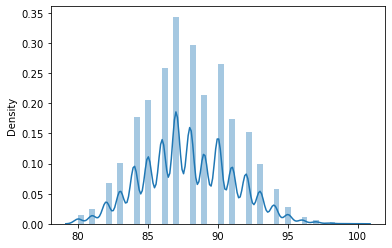

In [6]:
sns.distplot(df,x=df['points'])

C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

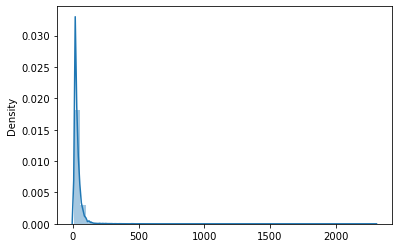

In [7]:
sns.distplot(df,x=df['price'])

In [8]:
def cat(x):
    if  x < 85 :
        return "1"
    if x < 90 and x >= 85:
        return "2"
    if x < 95 and x>= 90:
      return "3"
    if x>=95:
      return "4"


df['category'] = df['points'].apply(lambda x: cat(x))

C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

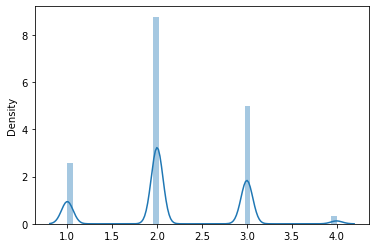

In [9]:
sns.distplot(df,x=df['category'])

In [19]:
words=[]
for i in df['description']:
    new_text=i.split(" ")
    for i in new_text:
        words.append(i)


This


In [21]:
from nltk import FreqDist

count_words=FreqDist(words)

In [22]:
count_words

FreqDist({'and': 403887, 'the': 202916, 'a': 185678, 'of': 183978, 'with': 147472, 'is': 110637, 'this': 71326, 'in': 71049, 'to': 63669, 'wine': 60460, ...})

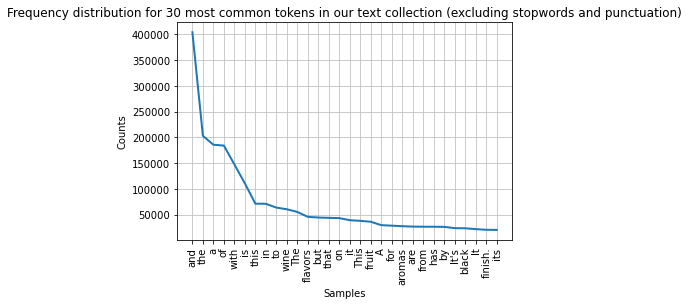

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [24]:
count_words.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

## Do a count frequency for each word (before)

In [6]:
print ("i havent do yet!")

i havent do yet!


In [12]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(comment):
    comment = re.sub("@[A-Za-z0-9]+","",comment) #Remove @ sign
    comment = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", comment) #Remove http links
    comment = re.sub(r'[^\w\s]','',comment)
    comment = comment.lower()
    comment = re.sub(r'\d+', '',comment) #remove numbers
    comment = " ".join(comment.split())
    comment = ''.join(c for c in comment if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    comment = comment.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) 
         if w.lower() in words or not w.isalpha())
    return comment
df1['description'] = df1['description'].map(lambda x: cleaner(x))


[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#Lemmatize Words

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df1['lemmatised_content'] = df1['description'].apply(lambda x: lemmatizer(x))
df1['lemmatised_content']=df1['lemmatised_content'].str.replace('-PRON-', '')
tokenizer = RegexpTokenizer(r'\w+')

#tokenize the words 

df1['remove_stopwords_content'] = df1['lemmatised_content'].apply(lambda x: tokenizer.tokenize(x))

#remove stop words

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    custom_words_rm = ['']
    final_words = [w for w in words if w not in custom_words_rm]
    return final_words

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [14]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content
1,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, of, fig, blackberry, and, cassis, be, a..."
2,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, the, memory, of, a, wine, once, make, by..."
3,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[this, spend, in, new, oak, and, fruit, from, ..."
4,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[this, be, the, top, wine, from, la, after, th..."
5,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, and, pure, from, the, opening, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,this is a smooth soft wine that is full of bla...,Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this be a smooth soft wine that be full of bla...,"[this, be, a, smooth, soft, wine, that, be, fu..."
96,96,US,this is an easygoing wine thats neither too oa...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this be an easygoing wine that s neither too o...,"[this, be, an, easygoing, wine, that, s, neith..."
97,97,US,blended with small of cabernet franc petit and...,NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blend with small of cabernet franc petit and t...,"[blend, with, small, of, cabernet, franc, peti..."
98,98,France,closer to than is this is with a cooler visage...,Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,close to than be this be with a cooler visage ...,"[close, to, than, be, this, be, with, a, coole..."


In [15]:
# Add our own words
from nltk.corpus import words
manywords = words.words()
new_words = manywords

#remove words with length less than 3 & urls (Can remove if we dont have good explanation about this)
def remove_shortwords(text, new_words):
    words = [w for w in text if len(w)>=3]
#   words = [w for w in text if w in new_words]
    return words

df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_stopwords(x))
df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_shortwords(x, new_words))
df1['remove_stopwords_content'].head().values

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


array([list(['ripe', 'fig', 'blackberry', 'cassis', 'oaky', 'chocolate', 'vanilla', 'full', 'layer', 'intense', 'cushion', 'palate', 'rich', 'black', 'bake', 'toasty', 'everlasting', 'finish', 'heady', 'ideally', 'balanced', 'drink']),
       list(['mac', 'memory', 'wine', 'make', 'mother', 'tremendously', 'delicious', 'balanced', 'complex', 'white', 'dark', 'gold', 'color', 'hazelnut', 'pear', 'compote', 'orange', 'peel', 'succulence', 'residual', 'sugar']),
       list(['spend', 'new', 'oak', 'fruit', 'aurora', 'madrona', 'among', 'aromatic', 'dense', 'toasty', 'deftly', 'toast', 'cigar', 'box', 'blackberry', 'black', 'cherry', 'coffee', 'graphite', 'polished', 'fine', 'sheen', 'frame', 'finish', 'load', 'dark', 'chocolate', 'drink']),
       list(['top', 'wine', 'high', 'point', 'vineyard', 'structure', 'density', 'considerable', 'acidity', 'still', 'wood', 'wine', 'extra', 'richness', 'concentration', 'produce', 'tari', 'family', 'formerly', 'wine', 'make', 'age', 'drink']),
      

In [16]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content
1,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat..."
2,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously..."
3,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon..."
4,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ..."
5,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,this is a smooth soft wine that is full of bla...,Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this be a smooth soft wine that be full of bla...,"[smooth, soft, wine, full, black, ripe, roughe..."
96,96,US,this is an easygoing wine thats neither too oa...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this be an easygoing wine that s neither too o...,"[easygoing, wine, neither, oaky, crisp, decent..."
97,97,US,blended with small of cabernet franc petit and...,NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blend with small of cabernet franc petit and t...,"[blend, small, cabernet, franc, petit, austere..."
98,98,France,closer to than is this is with a cooler visage...,Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,close to than be this be with a cooler visage ...,"[close, cooler, visage, spice, stalky, along, ..."


In [17]:
def join(text):
    sentence = " ".join(text)
    return sentence
df1['final_content'] = df1['remove_stopwords_content'].apply(lambda x: join(x))

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content
1,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...
2,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...
3,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...
4,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...
5,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,this is a smooth soft wine that is full of bla...,Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this be a smooth soft wine that be full of bla...,"[smooth, soft, wine, full, black, ripe, roughe...",smooth soft wine full black ripe rougher give ...
96,96,US,this is an easygoing wine thats neither too oa...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this be an easygoing wine that s neither too o...,"[easygoing, wine, neither, oaky, crisp, decent...",easygoing wine neither oaky crisp decent blend...
97,97,US,blended with small of cabernet franc petit and...,NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blend with small of cabernet franc petit and t...,"[blend, small, cabernet, franc, petit, austere...",blend small cabernet franc petit austere unfus...
98,98,France,closer to than is this is with a cooler visage...,Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,close to than be this be with a cooler visage ...,"[close, cooler, visage, spice, stalky, along, ...",close cooler visage spice stalky along plenty ...


In [19]:
#df1.to_csv('demo3.csv')

## Do a count frequency for each word (after) to show what is left

In [20]:
print ("i havent do!")

i havent do!


## Text Analysis using Flair

In [21]:
import flair
from flair.models import TextClassifier
from segtok.segmenter import split_single
from flair.data import Sentence

def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

In [22]:
classifier = TextClassifier.load('en-sentiment')

df1['sentences'] = df1.final_content.apply(make_sentences)
df1['flair_scores'] = df1.sentences.apply(get_scores)

2021-03-05 15:47:31,814 loading file C:\Users\YL\.flair\models\sentiment-en-mix-distillbert_3.1.pt


C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
df1 = df1.drop(columns='sentences')

In [24]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content,flair_scores
1,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...,[1.0]
2,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...,[0.999]
3,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...,[0.999]
4,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...,[1.0]
5,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...,[0.999]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,this is a smooth soft wine that is full of bla...,Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this be a smooth soft wine that be full of bla...,"[smooth, soft, wine, full, black, ripe, roughe...",smooth soft wine full black ripe rougher give ...,[0.999]
96,96,US,this is an easygoing wine thats neither too oa...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this be an easygoing wine that s neither too o...,"[easygoing, wine, neither, oaky, crisp, decent...",easygoing wine neither oaky crisp decent blend...,[-0.999]
97,97,US,blended with small of cabernet franc petit and...,NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blend with small of cabernet franc petit and t...,"[blend, small, cabernet, franc, petit, austere...",blend small cabernet franc petit austere unfus...,[0.954]
98,98,France,closer to than is this is with a cooler visage...,Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,close to than be this be with a cooler visage ...,"[close, cooler, visage, spice, stalky, along, ...",close cooler visage spice stalky along plenty ...,[0.999]


In [25]:
df1['flair_scores'] = [','.join(map(str, l)) for l in df1['flair_scores']]
df1["flair_scores"] = pd.to_numeric(df1["flair_scores"], downcast="float")

In [26]:
conditions = [
(df1['flair_scores'] >= 0.05),
(df1['flair_scores'] <= -0.05),
((df1['flair_scores'] < 0.05) & (df1['flair_scores'] > -0.05))
]

values = ['positive', 'negative', 'neutral']

df1['flair_sentiment'] = np.select(conditions, values)

In [27]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content,flair_scores,flair_sentiment
1,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...,1.000,positive
2,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...,0.999,positive
3,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...,0.999,positive
4,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...,1.000,positive
5,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...,0.999,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,this is a smooth soft wine that is full of bla...,Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this be a smooth soft wine that be full of bla...,"[smooth, soft, wine, full, black, ripe, roughe...",smooth soft wine full black ripe rougher give ...,0.999,positive
96,96,US,this is an easygoing wine thats neither too oa...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this be an easygoing wine that s neither too o...,"[easygoing, wine, neither, oaky, crisp, decent...",easygoing wine neither oaky crisp decent blend...,-0.999,negative
97,97,US,blended with small of cabernet franc petit and...,NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blend with small of cabernet franc petit and t...,"[blend, small, cabernet, franc, petit, austere...",blend small cabernet franc petit austere unfus...,0.954,positive
98,98,France,closer to than is this is with a cooler visage...,Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,close to than be this be with a cooler visage ...,"[close, cooler, visage, spice, stalky, along, ...",close cooler visage spice stalky along plenty ...,0.999,positive


## Vader

In [30]:
sentiment_analyser = SentimentIntensityAnalyzer()

sentiments_vader = []

for i in df1.final_content:
    sentiments_vader.append(sentiment_analyser.polarity_scores(i).get('compound'))
    
sentiments_vader = np.asarray(sentiments_vader)

df1['sentiment_vader'] = pd.Series(data=sentiments_vader)
df1 = df1.reset_index(drop=True)

In [33]:
conditions = [
    (df1['sentiment_vader'] >= 0.05),
     (df1['sentiment_vader'] <= -0.05),
    ((df1['sentiment_vader'] < 0.05) & (df1['sentiment_vader'] > -0.05))
    ]

values = ['positive', 'negative', 'neutral']

df1['vader'] = np.select(conditions, values)

df1.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader
0,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...,1.000,positive,0.6115,positive
1,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...,0.999,positive,0.2023,positive
2,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...,0.999,positive,0.6124,positive
3,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...,1.000,positive,0.7269,positive
4,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...,0.999,positive,0.8588,positive
5,6,Spain,slightly gritty include a sweet note of pastry...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,slightly gritty include a sweet note of pastry...,"[slightly, gritty, include, sweet, note, pastr...",slightly gritty include sweet note pastry alon...,0.999,positive,0.4939,positive
6,7,Spain,lush cedary are luxe and offer of marzipan and...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,lush cedary be luxe and offer of marzipan and ...,"[lush, cedary, luxe, offer, marzipan, vanilla,...",lush cedary luxe offer marzipan vanilla bruise...,0.981,positive,0.4005,positive
7,8,US,this vineyard was formerly bottled as find str...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,this vineyard be formerly bottle as find strik...,"[vineyard, formerly, bottle, find, strike, chu...",vineyard formerly bottle find strike chunky bl...,-0.759,negative,0.5994,positive
8,9,US,the producer from two of the vineyard for this...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,the producer from two of the vineyard for this...,"[producer, two, vineyard, high, elevation, bri...",producer two vineyard high elevation bright ac...,1.000,positive,0.9274,positive
9,10,Italy,elegance complexity and structure come togethe...,Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio,elegance complexity and structure come togethe...,"[elegance, complexity, structure, come, togeth...",elegance complexity structure come together go...,0.999,positive,0.5719,positive


## Textblob

In [34]:
from textblob import TextBlob

sentiments_textblob = []

for review in df1.final_content:
    review = TextBlob(review)
    sentiments_textblob.append(review.sentiment.polarity)

sentiments_textblob = np.asarray(sentiments_textblob)   

df1['sentiment_textblob'] = pd.Series(data=sentiments_textblob)
df1= df1.reset_index(drop=True)
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob
0,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...,1.000,positive,0.6115,positive,0.331667
1,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...,0.999,positive,0.2023,positive,0.137500
2,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...,0.999,positive,0.6124,positive,0.167273
3,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...,1.000,positive,0.7269,positive,0.152000
4,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...,0.999,positive,0.8588,positive,0.164286


In [35]:
conditions = [
    (df1['sentiment_textblob'] > 0),
    (df1['sentiment_textblob'] < 0),
    (df1['sentiment_textblob'] == 0)
    ]

values = ['positive', 'negative', 'neutral']

df1['textblob'] = np.select(conditions, values)

df1.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,lemmatised_content,remove_stopwords_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob
0,1,Spain,ripe of fig blackberry and cassis are and by a...,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis be and by a ...,"[ripe, fig, blackberry, cassis, oaky, chocolat...",ripe fig blackberry cassis oaky chocolate vani...,1.000,positive,0.6115,positive,0.331667,positive
1,2,US,mac the memory of a wine once made by his moth...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once make by mother ...,"[mac, memory, wine, make, mother, tremendously...",mac memory wine make mother tremendously delic...,0.999,positive,0.2023,positive,0.137500,positive
2,3,US,this spent in new oak and fruit from aurora an...,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spend in new oak and fruit from aurora an...,"[spend, new, oak, fruit, aurora, madrona, amon...",spend new oak fruit aurora madrona among aroma...,0.999,positive,0.6124,positive,0.167273,positive
3,4,France,this is the top wine from la after the highest...,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this be the top wine from la after the high po...,"[top, wine, high, point, vineyard, structure, ...",top wine high point vineyard structure density...,1.000,positive,0.7269,positive,0.152000,positive
4,5,Spain,deep dense and pure from the opening bell this...,Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,"[deep, dense, pure, opening, bell, toro, winne...",deep dense pure opening bell toro winner dark ...,0.999,positive,0.8588,positive,0.164286,positive
5,6,Spain,slightly gritty include a sweet note of pastry...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,slightly gritty include a sweet note of pastry...,"[slightly, gritty, include, sweet, note, pastr...",slightly gritty include sweet note pastry alon...,0.999,positive,0.4939,positive,0.420000,positive
6,7,Spain,lush cedary are luxe and offer of marzipan and...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,lush cedary be luxe and offer of marzipan and ...,"[lush, cedary, luxe, offer, marzipan, vanilla,...",lush cedary luxe offer marzipan vanilla bruise...,0.981,positive,0.4005,positive,0.040476,positive
7,8,US,this vineyard was formerly bottled as find str...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,this vineyard be formerly bottle as find strik...,"[vineyard, formerly, bottle, find, strike, chu...",vineyard formerly bottle find strike chunky bl...,-0.759,negative,0.5994,positive,0.250000,positive
8,9,US,the producer from two of the vineyard for this...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,the producer from two of the vineyard for this...,"[producer, two, vineyard, high, elevation, bri...",producer two vineyard high elevation bright ac...,1.000,positive,0.9274,positive,0.212000,positive
9,10,Italy,elegance complexity and structure come togethe...,Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio,elegance complexity and structure come togethe...,"[elegance, complexity, structure, come, togeth...",elegance complexity structure come together go...,0.999,positive,0.5719,positive,0.257143,positive
